In [275]:
import pandas as pd

In [276]:
Alice = pd.read_csv('CQLC 4 CQLC Challenege 2022 ALICE Data.csv')
Alice.rename(columns={'Zip Code': 'ZIP'}, inplace=True)
Alice = Alice[['ZIP', 'Households', 'Poverty Households', 'ALICE Households', 'Above ALICE Households']]
Alice

,ZIP,Households,Poverty Households,ALICE Households,Above ALICE Households
0,75001,9355,759,3141,5455
1,75002,22731,985,5173,16573
2,75006,18491,1363,5698,11430
3,75007,20170,1453,4708,14009
4,75009,8507,567,1228,6712
...,...,...,...,...,...
1683,79932,10154,1588,2087,6479
1684,79934,9513,1088,2212,6213
1685,79935,6537,1227,1706,3604
1686,79936,35900,5238,11443,19219


In [277]:
Harris = pd.read_csv('C:\\Users\\dperez\\Downloads\\SVI Data Analyst Presentation\\Harris_County_Zipcodes.csv')
Coords = pd.read_csv('C:\\Users\\dperez\\Downloads\\SVI Data Analyst Presentation\\Zip_Code_Coordinates.csv')
Harris = Harris.merge(Coords, on = 'ZIP')
SVI = Alice
Harris = Harris.merge(SVI, on = 'ZIP')
Harris

,ZIP,LAT,LNG,Households,Poverty Households,ALICE Households,Above ALICE Households
0,77565,29.535935,-95.026393,2997,201,945,1851
1,77573,29.503785,-95.087300,34834,2136,5520,27178
2,77362,30.160534,-95.669154,2317,265,565,1487
3,77010,29.753624,-95.359810,529,0,81,448
4,77546,29.515074,-95.192133,18777,693,3522,14562
...,...,...,...,...,...,...,...
150,77386,30.100255,-95.356479,21060,1603,2966,16491
151,77388,30.057802,-95.470985,17711,1455,3941,12315
152,77389,30.123469,-95.517064,14072,871,2274,10927
153,77327,30.318169,-94.915716,10281,2297,4030,3954


In [278]:
Harris.describe()

,ZIP,LAT,LNG,Households,Poverty Households,ALICE Households,Above ALICE Households
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,77205.193548,29.811395,-95.390060,13312.722581,1762.180645,3975.354839,7575.187097
std,206.364955,0.170497,0.203717,7487.874270,1118.372388,2247.195773,5676.115992
min,77002.000000,29.503785,-95.932255,334.000000,0.000000,81.000000,203.000000
25%,77040.500000,29.688203,-95.521402,8972.000000,988.000000,2507.000000,3742.000000
50%,77080.000000,29.771545,-95.401748,12078.000000,1493.000000,3749.000000,6372.000000
75%,77388.500000,29.922754,-95.255176,16628.000000,2311.500000,5223.000000,9543.500000
max,77598.000000,30.318169,-94.859125,40821.000000,6903.000000,12063.000000,30860.000000


C:\Users\dperez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dperez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dperez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

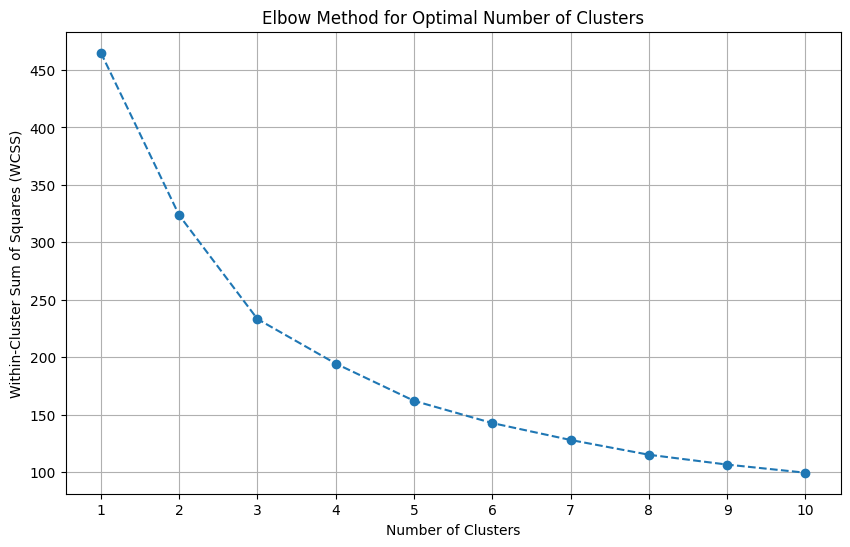

In [279]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Extract the relevant features
features = Harris[['LAT', 'LNG', 'ALICE Households']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform the elbow test
wcss = []
range_n_clusters = range(1, 11)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()


C:\Users\dperez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster
0    2957.0
1    5773.0
Name: ALICE Households, dtype: float64


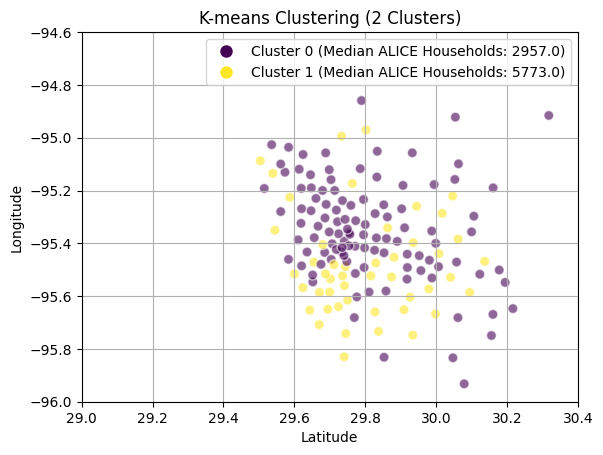

In [280]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Extract the relevant features
features = Harris[['LAT', 'LNG', 'ALICE Households']]

# Perform K-means clustering with 4 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(features)

# Assign cluster labels to the original DataFrame
Harris['Cluster'] = clusters

# Calculate the median ALICE Households for each cluster
median_alice_households = Harris.groupby('Cluster')['ALICE Households'].median()

# Print the median ALICE Households for each cluster
print(median_alice_households)

# Create a scatter plot
scatter = plt.scatter(Harris['LAT'], Harris['LNG'], c=Harris['Cluster'], cmap='viridis', marker='o', s=50, alpha=0.6, edgecolors='w')


plt.legend(handles=handles, loc='best')
plt.title('K-means Clustering (2 Clusters)')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.xlim(29, 30.4)
plt.ylim(-96, -94.6)
plt.grid(True)
plt.show()

In [281]:
import pandas as pd
from sklearn.cluster import KMeans
import folium
from folium.plugins import MarkerCluster

# Extract the relevant features
features = Harris[['LAT', 'LNG', 'ALICE Households']]

# Perform K-means clustering with 4 clusters
kmeans = KMeans(n_clusters= 2, random_state=42)
clusters = kmeans.fit_predict(features)

# Assign cluster labels to the original DataFrame
Harris['Cluster'] = clusters.astype(int)

# Ensure the 'ZIP' column exists
if 'ZIP' not in Harris.columns:
    Harris['ZIP'] = 'Unknown'

# Create a color map for the clusters
cluster_colors = ['red', 'blue', 'green', 'purple', 'cyan']

# Create a Folium map centered on the average latitude and longitude
map_center = [Harris['LAT'].mean(), Harris['LNG'].mean()]
m = folium.Map(location=map_center, zoom_start=10)

# Add markers to the map
for _, row in Harris.iterrows():
    folium.CircleMarker(
        location=[row['LAT'], row['LNG']],
        radius=row['ALICE Households'] / 500,  # Adjust this scale as needed
        color=cluster_colors[int(row['Cluster'])],
        fill=True,
        fill_color=cluster_colors[int(row['Cluster'])],
        fill_opacity=0.6,
        popup=f"ZIP: {row['ZIP']}<br>ALICE Households: {row['ALICE Households']}"
    ).add_to(m)

# Display the map in a Jupyter notebook
display(m)

C:\Users\dperez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Okay you know what let's see correlations to races

In [282]:
#This section is to make the column headers from the ACS 2022 easier for me to understand  
descriptions_list = [
    "Estimate!!RACE!!Total population!!One race!!White",
    "Estimate!!RACE!!Total population!!One race!!Black or African American",
    "Estimate!!RACE!!Total population!!One race!!American Indian and Alaska Native",
    "Estimate!!RACE!!Total population!!One race!!Asian",
    "Estimate!!RACE!!Total population!!One race!!Native Hawaiian and Other Pacific Islander",
    "Estimate!!RACE!!Total population!!One race!!Some Other Race",
    "Estimate!!RACE!!Total population!!Two or More Races",
    "Estimate!!HISPANIC OR LATINO AND RACE!!Total population"
]

# Add single quotes to each element and join them into a comma-separated string
quoted_descriptions = "', '".join(descriptions_list)
quoted_descriptions = f"'{quoted_descriptions}'"

print(quoted_descriptions)


'Estimate!!RACE!!Total population!!One race!!White', 'Estimate!!RACE!!Total population!!One race!!Black or African American', 'Estimate!!RACE!!Total population!!One race!!American Indian and Alaska Native', 'Estimate!!RACE!!Total population!!One race!!Asian', 'Estimate!!RACE!!Total population!!One race!!Native Hawaiian and Other Pacific Islander', 'Estimate!!RACE!!Total population!!One race!!Some Other Race', 'Estimate!!RACE!!Total population!!Two or More Races', 'Estimate!!HISPANIC OR LATINO AND RACE!!Total population'


In [283]:
#ACS2022
# Load the files
data_path = 'ACSDP5Y2022.DP05-Data.csv'

data_df = pd.read_csv(data_path)

data_df_cleaned = data_df.drop(0)
data_df_cleaned.columns = data_df.iloc[0]

# Drop the row that was used as the new header
data_df_cleaned = data_df_cleaned.drop(1).reset_index(drop=True)

# Create a dictionary to map the old column names to the new, simpler ones
new_column_names = {
    "Estimate!!RACE!!Total population!!One race!!White": "White",
    "Estimate!!RACE!!Total population!!One race!!Black or African American": "Black_or_African_American",
    "Estimate!!RACE!!Total population!!One race!!American Indian and Alaska Native": "American_Indian_Alaska_Native",
    "Estimate!!RACE!!Total population!!One race!!Asian": "Asian",
    "Estimate!!RACE!!Total population!!One race!!Native Hawaiian and Other Pacific Islander": "Native_Hawaiian_Other_PI",
    "Estimate!!RACE!!Total population!!One race!!Some Other Race": "Some_Other_Race",
    "Estimate!!RACE!!Total population!!Two or More Races": "Two_or_More_Races",
    "Estimate!!HISPANIC OR LATINO AND RACE!!Total population": "Hispanic_or_Latino"
}

# Rename the columns in the Harris_Race DataFrame
data_df_cleaned = data_df_cleaned.rename(columns=new_column_names)
data_df_cleaned['ZIP'] = data_df_cleaned['Geographic Area Name'].str[6:]


# Add the additional columns you want to select
columns_to_select = ['Geography', 'ZIP', 'White', 'Black_or_African_American', 
                     'American_Indian_Alaska_Native', 'Asian', 'Native_Hawaiian_Other_PI', 'Some_Other_Race', 'Two_or_More_Races', 'Hispanic_or_Latino'
]

# Check columns 
race = data_df_cleaned[columns_to_select]
race


C:\Users\dperez\AppData\Local\Temp\ipykernel_29160\2439734812.py:5: DtypeWarning: Columns (2,3,4,5,6,7,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,58,59,60,61,62,63,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,232,240,248,312,326,360) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv(data_path)


,Geography,ZIP,White,Black_or_African_American,American_Indian_Alaska_Native,Asian,Native_Hawaiian_Other_PI,Some_Other_Race,Two_or_More_Races,Two_or_More_Races,Hispanic_or_Latino
0,860Z200US00602,00602,18479,555,47,48,0,1476,17037,17037,37642
1,860Z200US00603,00603,36216,1719,32,28,0,6852,4228,4228,49075
2,860Z200US00606,00606,3721,9,0,0,0,1559,301,301,5590
3,860Z200US00610,00610,11182,576,2,0,0,1635,12147,12147,25542
4,860Z200US00611,00611,765,14,0,0,0,478,58,58,1315
...,...,...,...,...,...,...,...,...,...,...,...
33768,860Z200US99923,99923,25,0,0,0,0,0,0,0,25
33769,860Z200US99925,99925,413,4,291,7,0,4,201,201,920
33770,860Z200US99926,99926,108,5,1232,14,31,7,68,68,1465
33771,860Z200US99927,99927,14,0,0,0,0,0,0,0,14


In [284]:
# Convert the ZIP columns to string in both DataFrames
Harris['ZIP'] = Harris['ZIP'].astype(str)
race['ZIP'] = race['ZIP'].astype(str)

# Now perform the merge
Harris_Race = pd.merge(Harris, race, on='ZIP')

Harris_Race = Harris_Race.drop('Geography', axis=1)

Harris_Race

C:\Users\dperez\AppData\Local\Temp\ipykernel_29160\1828860372.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race['ZIP'] = race['ZIP'].astype(str)


,ZIP,LAT,LNG,Households,Poverty Households,ALICE Households,Above ALICE Households,Cluster,White,Black_or_African_American,American_Indian_Alaska_Native,Asian,Native_Hawaiian_Other_PI,Some_Other_Race,Two_or_More_Races,Two_or_More_Races,Hispanic_or_Latino
0,77565,29.535935,-95.026393,2997,201,945,1851,0,5089,335,9,116,0,359,585,585,6493
1,77573,29.503785,-95.087300,34834,2136,5520,27178,1,70660,6867,224,5569,0,2705,9679,9679,95704
2,77362,30.160534,-95.669154,2317,265,565,1487,0,5222,580,0,205,0,219,400,400,6626
3,77010,29.753624,-95.359810,529,0,81,448,0,837,0,0,0,0,0,0,0,837
4,77546,29.515074,-95.192133,18777,693,3522,14562,0,41617,2814,21,3817,0,1279,4282,4282,53830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,77386,30.100255,-95.356479,21060,1603,2966,16491,0,46443,6501,247,3825,0,2413,7387,7387,66816
151,77388,30.057802,-95.470985,17711,1455,3941,12315,0,31404,8672,380,3704,22,3269,4676,4676,52127
152,77389,30.123469,-95.517064,14072,871,2274,10927,0,29276,3421,286,2135,21,2393,6142,6142,43674
153,77327,30.318169,-94.915716,10281,2297,4030,3954,0,19566,2495,81,30,11,5675,5815,5815,33673


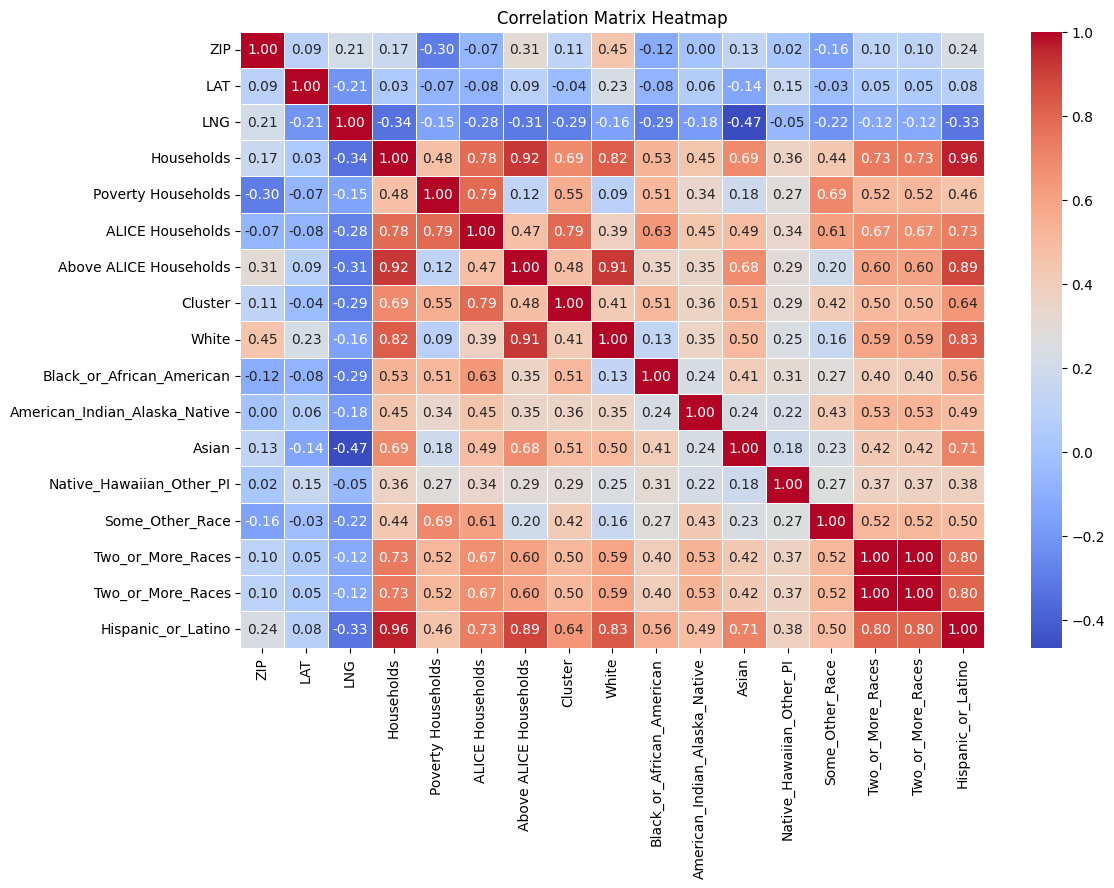

In [285]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the correlation matrix
correlation_matrix = Harris_Race.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

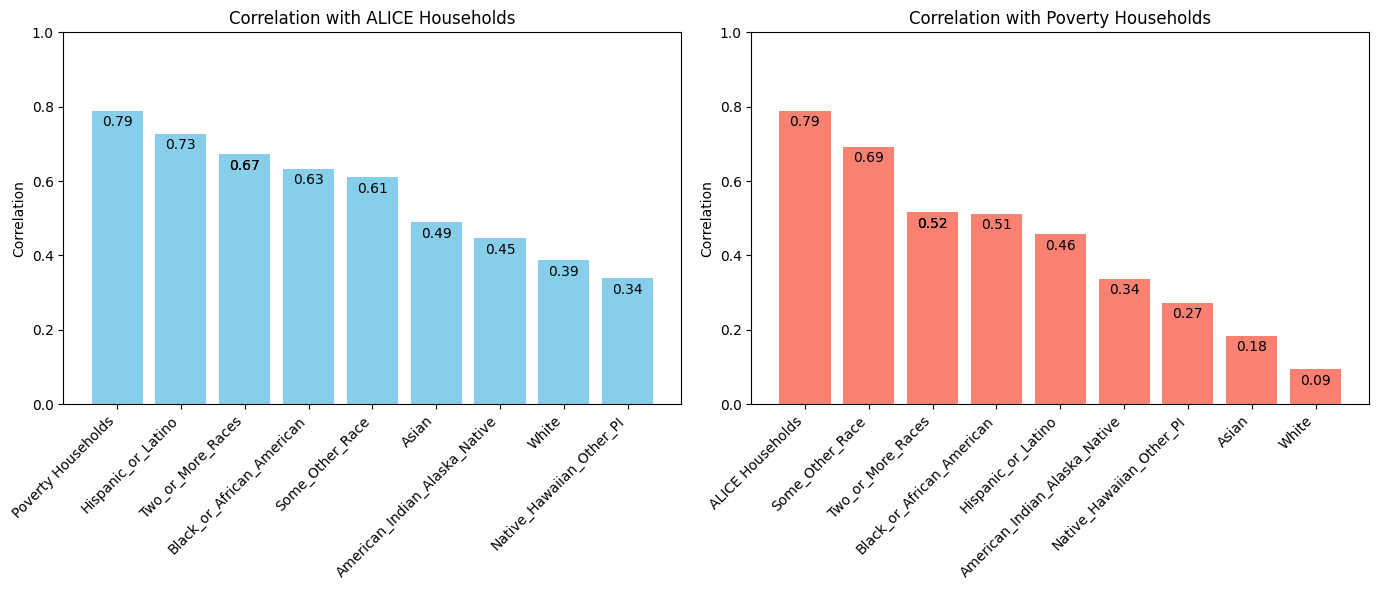

In [286]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Harris_Race is defined and contains the necessary columns
# Re-calculate the correlation matrix
correlation_matrix = Harris_Race.corr()

# Prepare data for bar charts
alice_correlations = correlation_matrix.loc['ALICE Households', [ 'Poverty Households',
    'White', 'Black_or_African_American', 'American_Indian_Alaska_Native',
    'Asian', 'Native_Hawaiian_Other_PI', 'Some_Other_Race', 
    'Two_or_More_Races', 'Hispanic_or_Latino'
]]

poverty_correlations = correlation_matrix.loc['Poverty Households', [ 'ALICE Households',
    'White', 'Black_or_African_American', 'American_Indian_Alaska_Native',
    'Asian', 'Native_Hawaiian_Other_PI', 'Some_Other_Race', 
    'Two_or_More_Races', 'Hispanic_or_Latino'
]]

# Sorting the correlations in descending order and adding data labels to each bar
plt.figure(figsize=(14, 6))

# Bar chart for ALICE correlations
plt.subplot(1, 2, 1)
sorted_alice = alice_correlations.sort_values(ascending=False)
bars1 = plt.bar(sorted_alice.index, sorted_alice, color='skyblue')
plt.title('Correlation with ALICE Households')
plt.ylabel('Correlation')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')

# Adding data labels
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05 if bar.get_height() > 0 else bar.get_height() + 0.05, 
             f'{bar.get_height():.2f}', ha='center', va='bottom')

# Bar chart for Poverty correlations
plt.subplot(1, 2, 2)
sorted_poverty = poverty_correlations.sort_values(ascending=False)
bars2 = plt.bar(sorted_poverty.index, sorted_poverty, color='salmon')
plt.title('Correlation with Poverty Households')
plt.ylabel('Correlation')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')

# Adding data labels
for bar in bars2:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05 if bar.get_height() > 0 else bar.get_height() + 0.25, 
             f'{bar.get_height():.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [287]:
import pandas as pd
from sklearn.cluster import KMeans
import folium
from folium.plugins import MarkerCluster

# Extract the relevant features
features = Harris_Race[['LAT', 'LNG', 'Poverty Households']]

# Perform K-means clustering with 4 clusters
kmeans = KMeans(n_clusters= 2, random_state=42)
clusters = kmeans.fit_predict(features)

# Assign cluster labels to the original DataFrame
Harris_Race['Cluster'] = clusters.astype(int)

# Ensure the 'ZIP' column exists
if 'ZIP' not in Harris_Race.columns:
    Harris_Race['ZIP'] = 'Unknown'

# Create a color map for the clusters
cluster_colors = ['blue', 'red', 'green', 'purple', 'cyan']

# Create a Folium map centered on the average latitude and longitude
map_center = [Harris_Race['LAT'].mean(), Harris_Race['LNG'].mean()]
m = folium.Map(location=map_center, zoom_start=10)

# Add markers to the map
for _, row in Harris_Race.iterrows():
    folium.CircleMarker(
        location=[row['LAT'], row['LNG']],
        radius=row['Poverty Households'] / 250,  # Adjust this scale as needed
        color=cluster_colors[int(row['Cluster'])],
        fill=True,
        fill_color=cluster_colors[int(row['Cluster'])],
        fill_opacity=0.6,
        popup=f"ZIP: {row['ZIP']}<br>Poverty Households: {row['Poverty Households']}"
    ).add_to(m)

# Display the map in a Jupyter notebook
display(m)

C:\Users\dperez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Let's combine every map visual we've made into one along with plotting racial demographics. 

In [288]:
import pandas as pd
from sklearn.cluster import KMeans
import folium
from folium.plugins import MarkerCluster

# Color scheme for both layers
cluster_colors1 = ['red', 'blue']
cluster_colors2 = ['blue', 'red']

# First Map: ALICE Households
# Extract the relevant features
features_alice = Harris_Race[['LAT', 'LNG', 'ALICE Households']]

# Perform K-means clustering with 2 clusters
kmeans_alice = KMeans(n_clusters=2, random_state=42)
clusters_alice = kmeans_alice.fit_predict(features_alice)

# Assign cluster labels to the original DataFrame
Harris_Race['Cluster_ALICE'] = clusters_alice.astype(int)

# Create a Folium map centered on the average latitude and longitude
map_center = [Harris_Race['LAT'].mean(), Harris_Race['LNG'].mean()]
m = folium.Map(location=map_center, zoom_start=10)

# Create a FeatureGroup for ALICE Households
alice_group = folium.FeatureGroup(name="ALICE Households").add_to(m)

# Add markers to the ALICE Households group
for _, row in Harris_Race.iterrows():
    folium.CircleMarker(
        location=[row['LAT'], row['LNG']],
        radius=row['ALICE Households'] / 500,  # Adjust this scale as needed
        color=cluster_colors1[int(row['Cluster_ALICE'])],
        fill=True,
        fill_color=cluster_colors1[int(row['Cluster_ALICE'])],
        fill_opacity=0.6,
        popup=f"ZIP: {row['ZIP']}<br>ALICE Households: {row['ALICE Households']}"
    ).add_to(alice_group)

# Second Map: Poverty Households
# Extract the relevant features
features_poverty = Harris_Race[['LAT', 'LNG', 'Poverty Households']]

# Perform K-means clustering with 2 clusters
kmeans_poverty = KMeans(n_clusters=2, random_state=42)
clusters_poverty = kmeans_poverty.fit_predict(features_poverty)

# Assign cluster labels to the original DataFrame
Harris_Race['Cluster_Poverty'] = clusters_poverty.astype(int)

# Create a FeatureGroup for Poverty Households
poverty_group = folium.FeatureGroup(name="Poverty Households").add_to(m)

# Add markers to the Poverty Households group
for _, row in Harris_Race.iterrows():
    folium.CircleMarker(
        location=[row['LAT'], row['LNG']],
        radius=row['Poverty Households'] / 250,  # Adjust this scale as needed
        color=cluster_colors2[int(row['Cluster_Poverty'])],
        fill=True,
        fill_color=cluster_colors2[int(row['Cluster_Poverty'])],
        fill_opacity=0.6,
        popup=f"ZIP: {row['ZIP']}<br>Poverty Households: {row['Poverty Households']}"
    ).add_to(poverty_group)

# Create a FeatureGroup for White Households
white_group = folium.FeatureGroup(name="White").add_to(m)

# Add markers to the White Households group
for _, row in Harris_Race.iterrows():
    folium.CircleMarker(
        location=[row['LAT'], row['LNG']],
        radius=row['White'] / 1500,  # Adjust this scale as needed
        color=cluster_colors2,
        fill=True,
        fill_color=cluster_colors,
        fill_opacity=0.6,
        popup=f"ZIP: {row['ZIP']}<br>White Population: {row['White']}"
    ).add_to(white_group)

# Create a FeatureGroup for Black or African American Households
black_group = folium.FeatureGroup(name="Black or African American").add_to(m)

# Add markers to the Black or African American Households group
for _, row in Harris_Race.iterrows():
    folium.CircleMarker(
        location=[row['LAT'], row['LNG']],
        radius=row['Black_or_African_American'] / 1200,  # Adjust this scale as needed
        color=cluster_colors2,
        fill=True,
        fill_color=cluster_colors,
        fill_opacity=0.6,
        popup=f"ZIP: {row['ZIP']}<br>Black or African American Population: {row['Black_or_African_American']}"
    ).add_to(black_group)

# Create a FeatureGroup for American Indian and Alaska Native Households
native_group = folium.FeatureGroup(name="American Indian and Alaska Native").add_to(m)

# Add markers to the American Indian and Alaska Native Households group
for _, row in Harris_Race.iterrows():
    folium.CircleMarker(
        location=[row['LAT'], row['LNG']],
        radius=row['American_Indian_Alaska_Native'] / 750,  # Adjust this scale as needed
        color=cluster_colors2,
        fill=True,
        fill_color=cluster_colors,
        fill_opacity=0.6,
        popup=f"ZIP: {row['ZIP']}<br>American Indian and Alaska Native Population: {row['American_Indian_Alaska_Native']}"
    ).add_to(native_group)

# Create a FeatureGroup for Asian Households
asian_group = folium.FeatureGroup(name="Asian").add_to(m)

# Add markers to the Asian Households group
for _, row in Harris_Race.iterrows():
    folium.CircleMarker(
        location=[row['LAT'], row['LNG']],
        radius=row['Asian'] / 1000,  # Adjust this scale as needed
        color=cluster_colors2,
        fill=True,
        fill_color=cluster_colors,
        fill_opacity=0.6,
        popup=f"ZIP: {row['ZIP']}<br>Asian Population: {row['Asian']}"
    ).add_to(asian_group)

# Create a FeatureGroup for Native Hawaiian and Other Pacific Islander Households
pacific_islander_group = folium.FeatureGroup(name="Native Hawaiian and Other Pacific Islander").add_to(m)

# Add markers to the Native Hawaiian and Other Pacific Islander Households group
for _, row in Harris_Race.iterrows():
    folium.CircleMarker(
        location=[row['LAT'], row['LNG']],
        radius=row['Native_Hawaiian_Other_PI'] / 1500,  # Adjust this scale as needed
        color=cluster_colors2,
        fill=True,
        fill_color=cluster_colors,
        fill_opacity=0.6,
        popup=f"ZIP: {row['ZIP']}<br>Native Hawaiian and Other Pacific Islander Population: {row['Native_Hawaiian_Other_PI']}"
    ).add_to(pacific_islander_group)

# Create a FeatureGroup for Some Other Race Households
other_race_group = folium.FeatureGroup(name="Some Other Race").add_to(m)

# Add markers to the Some Other Race Households group
for _, row in Harris_Race.iterrows():
    folium.CircleMarker(
        location=[row['LAT'], row['LNG']],
        radius=row['Some_Other_Race'] / 1500,  # Adjust this scale as needed
        color=cluster_colors2,
        fill=True,
        fill_color=cluster_colors,
        fill_opacity=0.6,
        popup=f"ZIP: {row['ZIP']}<br>Some Other Race Population: {row['Some_Other_Race']}"
    ).add_to(other_race_group)



# Create a FeatureGroup for Hispanic or Latino Households
hispanic_group = folium.FeatureGroup(name="Hispanic or Latino").add_to(m)

# Add markers to the Hispanic or Latino Households group
for _, row in Harris_Race.iterrows():
    folium.CircleMarker(
        location=[row['LAT'], row['LNG']],
        radius=row['Hispanic_or_Latino'] / 2500,  # Adjust this scale as needed
        color=cluster_colors2,
        fill=True,
        fill_color=cluster_colors,
        fill_opacity=0.6,
        popup=f"ZIP: {row['ZIP']}<br>Hispanic or Latino Population: {row['Hispanic_or_Latino']}"
    ).add_to(hispanic_group)


# Add Layer Control to toggle between the two maps
folium.LayerControl().add_to(m)

# Display the map in a Jupyter notebook
display(m)


C:\Users\dperez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dperez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [291]:
m.save("United Way Alice Project Map.html")

In [289]:
Harris_Race

,ZIP,LAT,LNG,Households,Poverty Households,ALICE Households,Above ALICE Households,Cluster,White,Black_or_African_American,American_Indian_Alaska_Native,Asian,Native_Hawaiian_Other_PI,Some_Other_Race,Two_or_More_Races,Two_or_More_Races,Hispanic_or_Latino,Cluster_ALICE,Cluster_Poverty
0,77565,29.535935,-95.026393,2997,201,945,1851,1,5089,335,9,116,0,359,585,585,6493,0,1
1,77573,29.503785,-95.087300,34834,2136,5520,27178,1,70660,6867,224,5569,0,2705,9679,9679,95704,1,1
2,77362,30.160534,-95.669154,2317,265,565,1487,1,5222,580,0,205,0,219,400,400,6626,0,1
3,77010,29.753624,-95.359810,529,0,81,448,1,837,0,0,0,0,0,0,0,837,0,1
4,77546,29.515074,-95.192133,18777,693,3522,14562,1,41617,2814,21,3817,0,1279,4282,4282,53830,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,77386,30.100255,-95.356479,21060,1603,2966,16491,1,46443,6501,247,3825,0,2413,7387,7387,66816,0,1
151,77388,30.057802,-95.470985,17711,1455,3941,12315,1,31404,8672,380,3704,22,3269,4676,4676,52127,0,1
152,77389,30.123469,-95.517064,14072,871,2274,10927,1,29276,3421,286,2135,21,2393,6142,6142,43674,0,1
153,77327,30.318169,-94.915716,10281,2297,4030,3954,0,19566,2495,81,30,11,5675,5815,5815,33673,0,0


In [290]:
Harris.to_csv('ALICE_Coordinates.csv', index=False)
